<h1 align="center">Paquete de onda en mecánica cuántica ondulatoria</h1>
<div align="right">David A. Miranda, PhD<br>2023</div>

## 1. Cargar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## 2. Planteamiento del problema

Sea una partícula cuántica en una dimensión (1D), descrita por la función de onda $\psi(x, t)$

$$\psi(x, 0) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} g(k) e^{ikx} dk \qquad\qquad (1)$$

$$\omega = \frac{\hbar k^2}{2m} \qquad\qquad (2)$$

## 3. Métodos y definiciones

In [2]:
dpi = 300
fig_num = 0

In [3]:
def plot_wave_packet(σ, k_o, g_func, fig_num=0):
    x = np.linspace(-5*σ, 5*σ, 1000)
    k = np.linspace(-5*k_o, 5*k_o, 1000)

    g = g_func(σ, k_o, x, k)
    psi = np.sum([ g[n]*np.cos(k[n]*x) for n in range(len(g))], axis=0)
    psi /= np.trapz(np.abs(psi)**2, x=x)

    fig_num += 1

    plt.figure(dpi=dpi)
    plt.plot(x, psi)
    plt.hlines(max(psi), -σ/2, σ/2, linestyles='dotted', color='black', label=r'$\Delta x \approx \sigma = %0.2f$'%(σ))
    plt.vlines(-σ/2, 0, max(psi), linestyles='dotted', color='black')
    plt.vlines( σ/2, 0, max(psi), linestyles='dotted', color='black')
    plt.xlabel('x')
    plt.ylabel(r'$\psi(x, 0)$')
    plt.title('Figura %d' % fig_num)
    _ = plt.legend()

    fig_num += 1
    plt.figure(dpi=dpi)
    plt.plot(k, g)
    plt.hlines(max(g), -k_o, k_o, linestyles='dotted', color='black', label=r'$\Delta k \approx 2k_0 = %0.2f$'%(2*k_o))
    plt.vlines(-k_o, 0, max(g), linestyles='dotted', color='black')
    plt.vlines( k_o, 0, max(g), linestyles='dotted', color='black')
    plt.xlabel('k')
    plt.ylabel(r'$g(k)$')
    plt.title(r'Figura %d. $\Delta x \Delta k \approx %0.2f$' % (fig_num, σ * 2*k_o))
    _ = plt.legend()

    return fig_num

## 4. Paquetes de onda y relaciones entre $\Delta x$ y $\Delta k$

### 4.1. Serie de Fourier

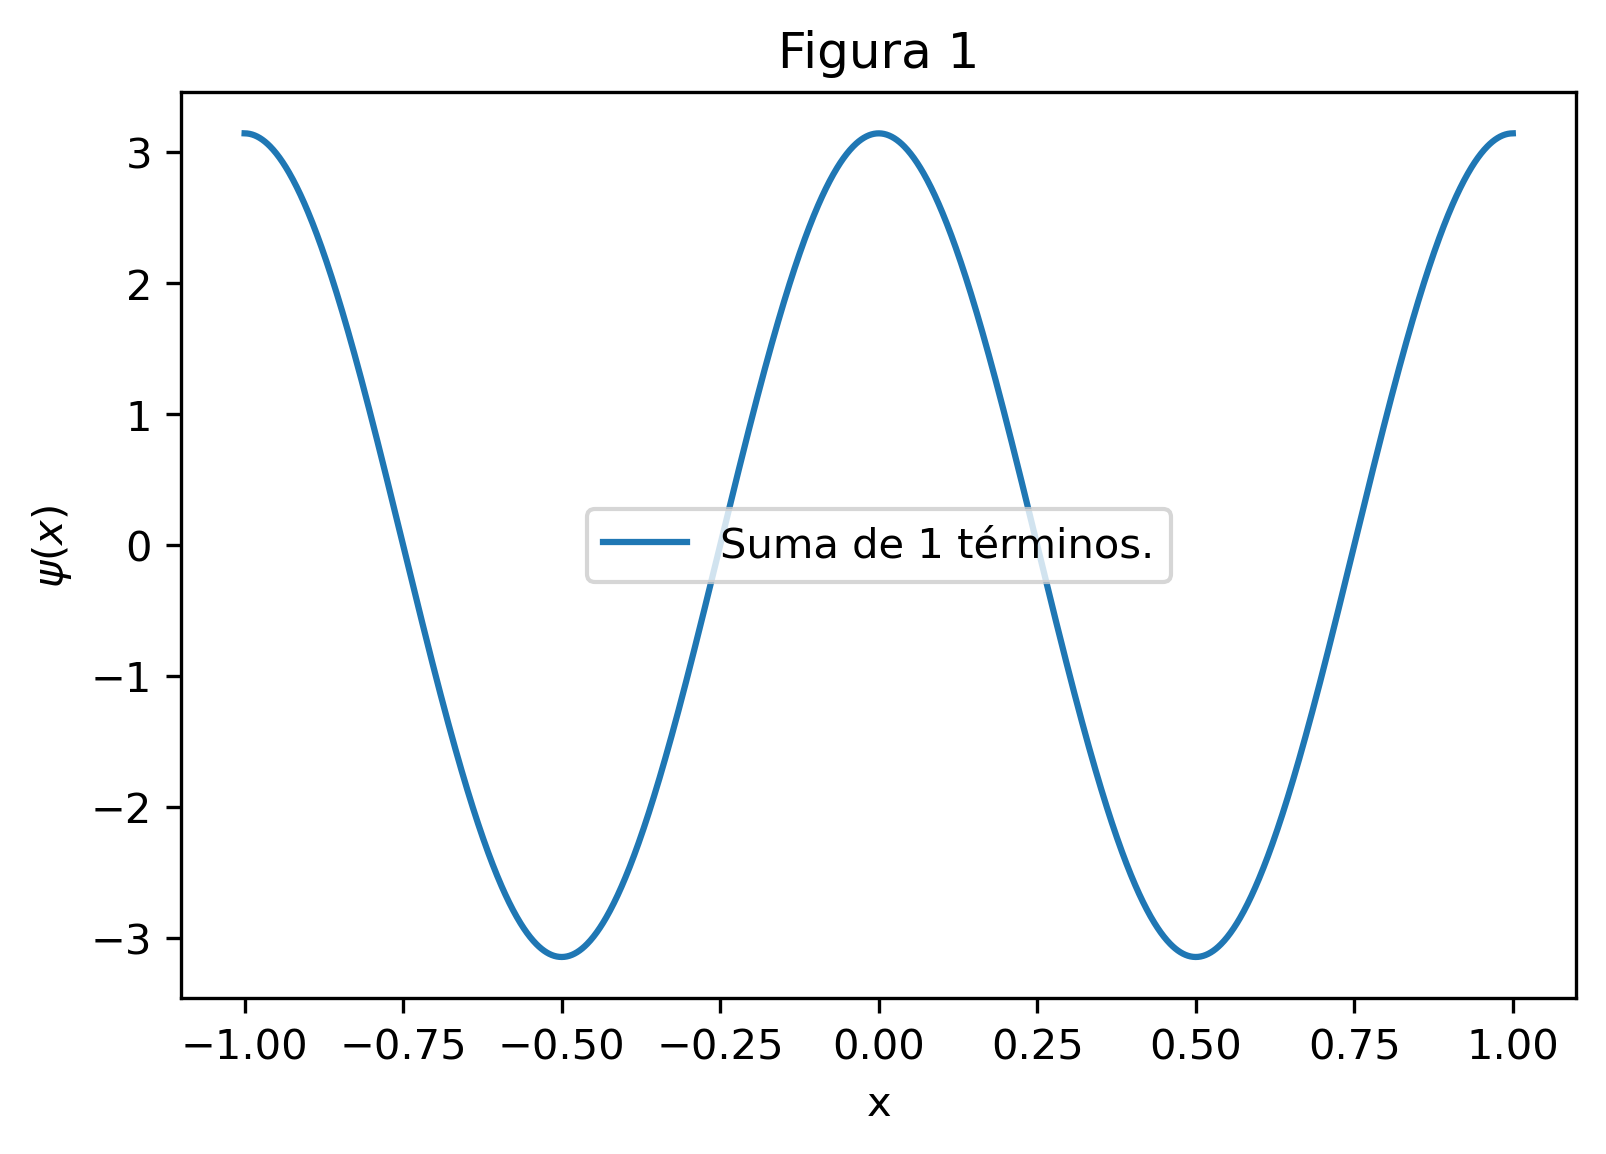

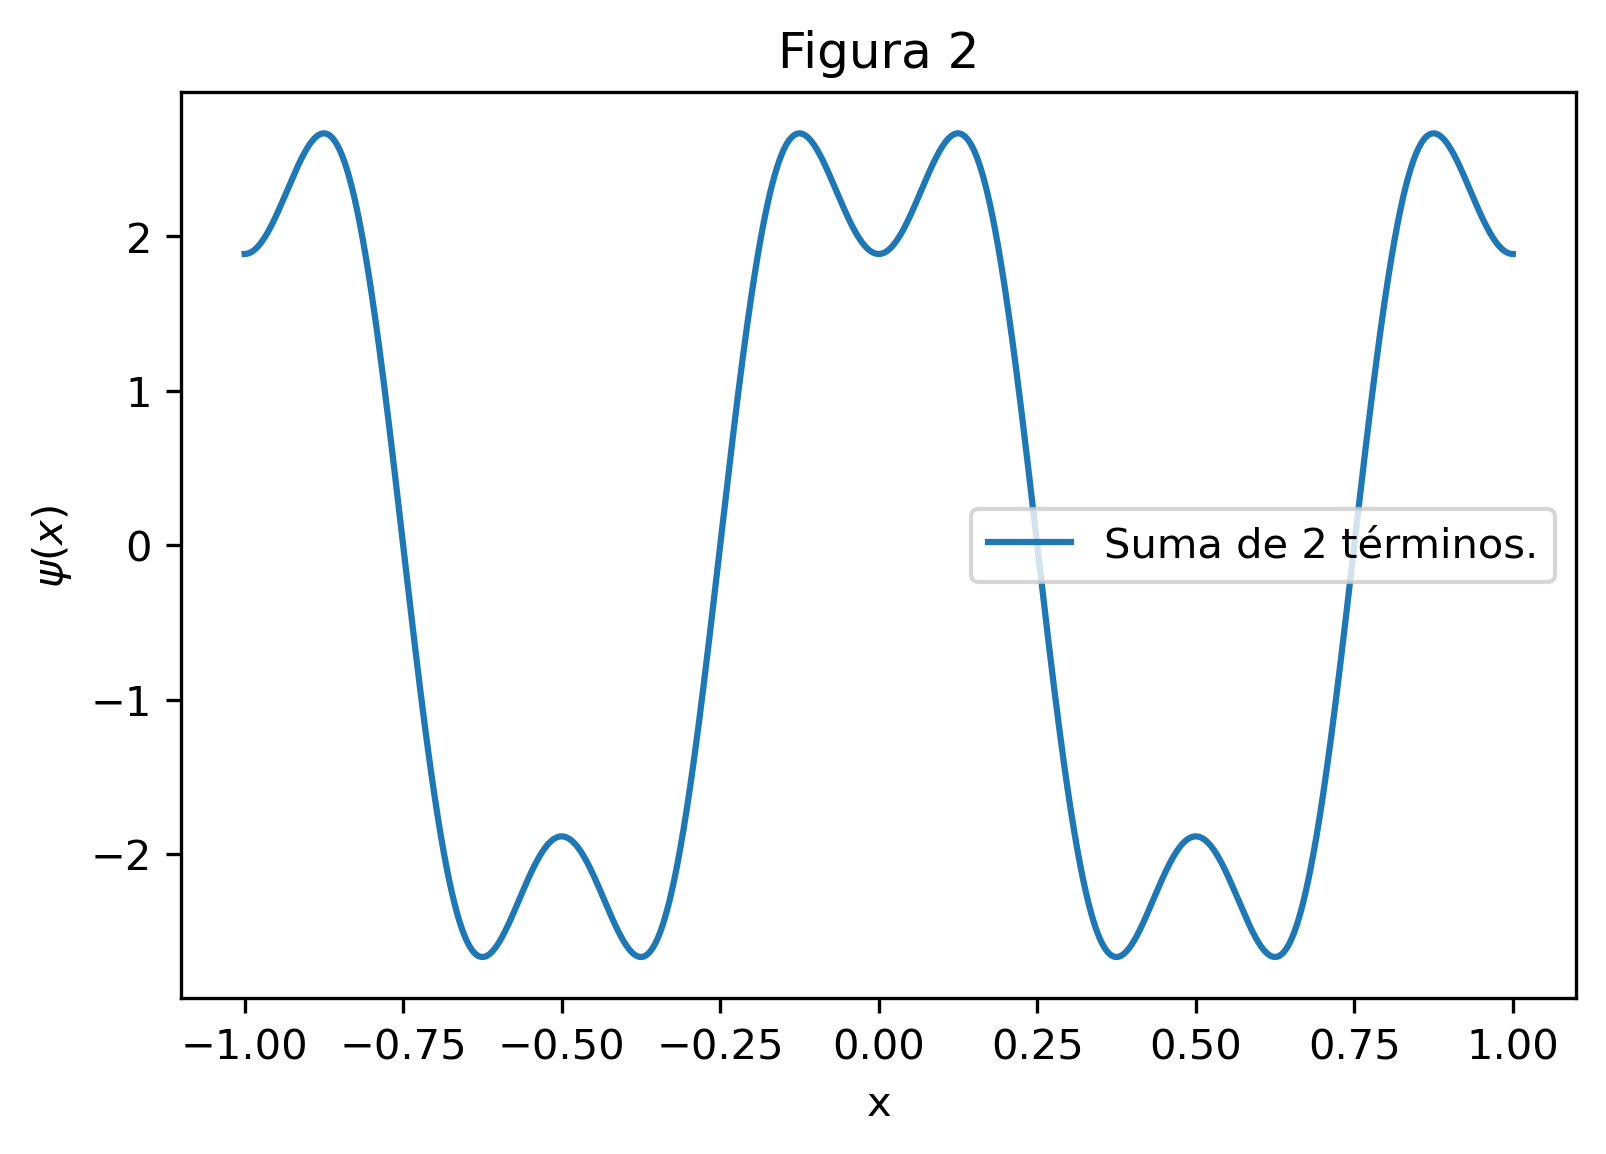

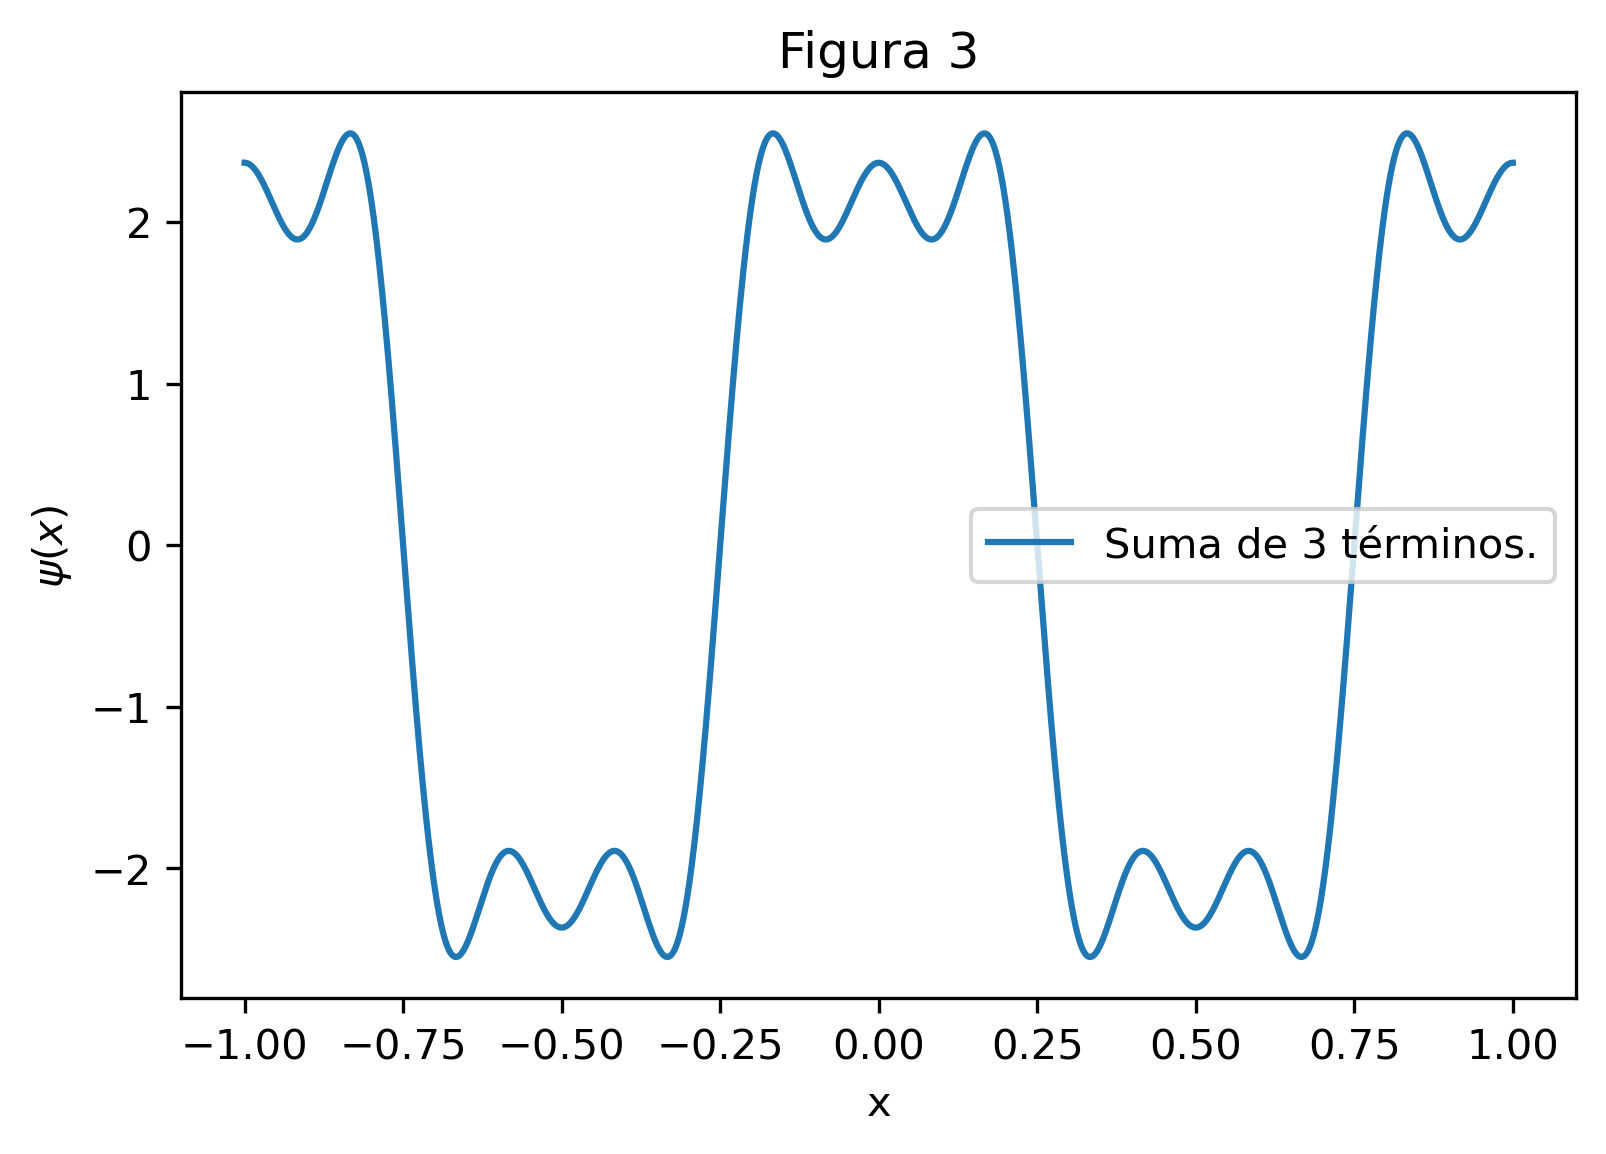

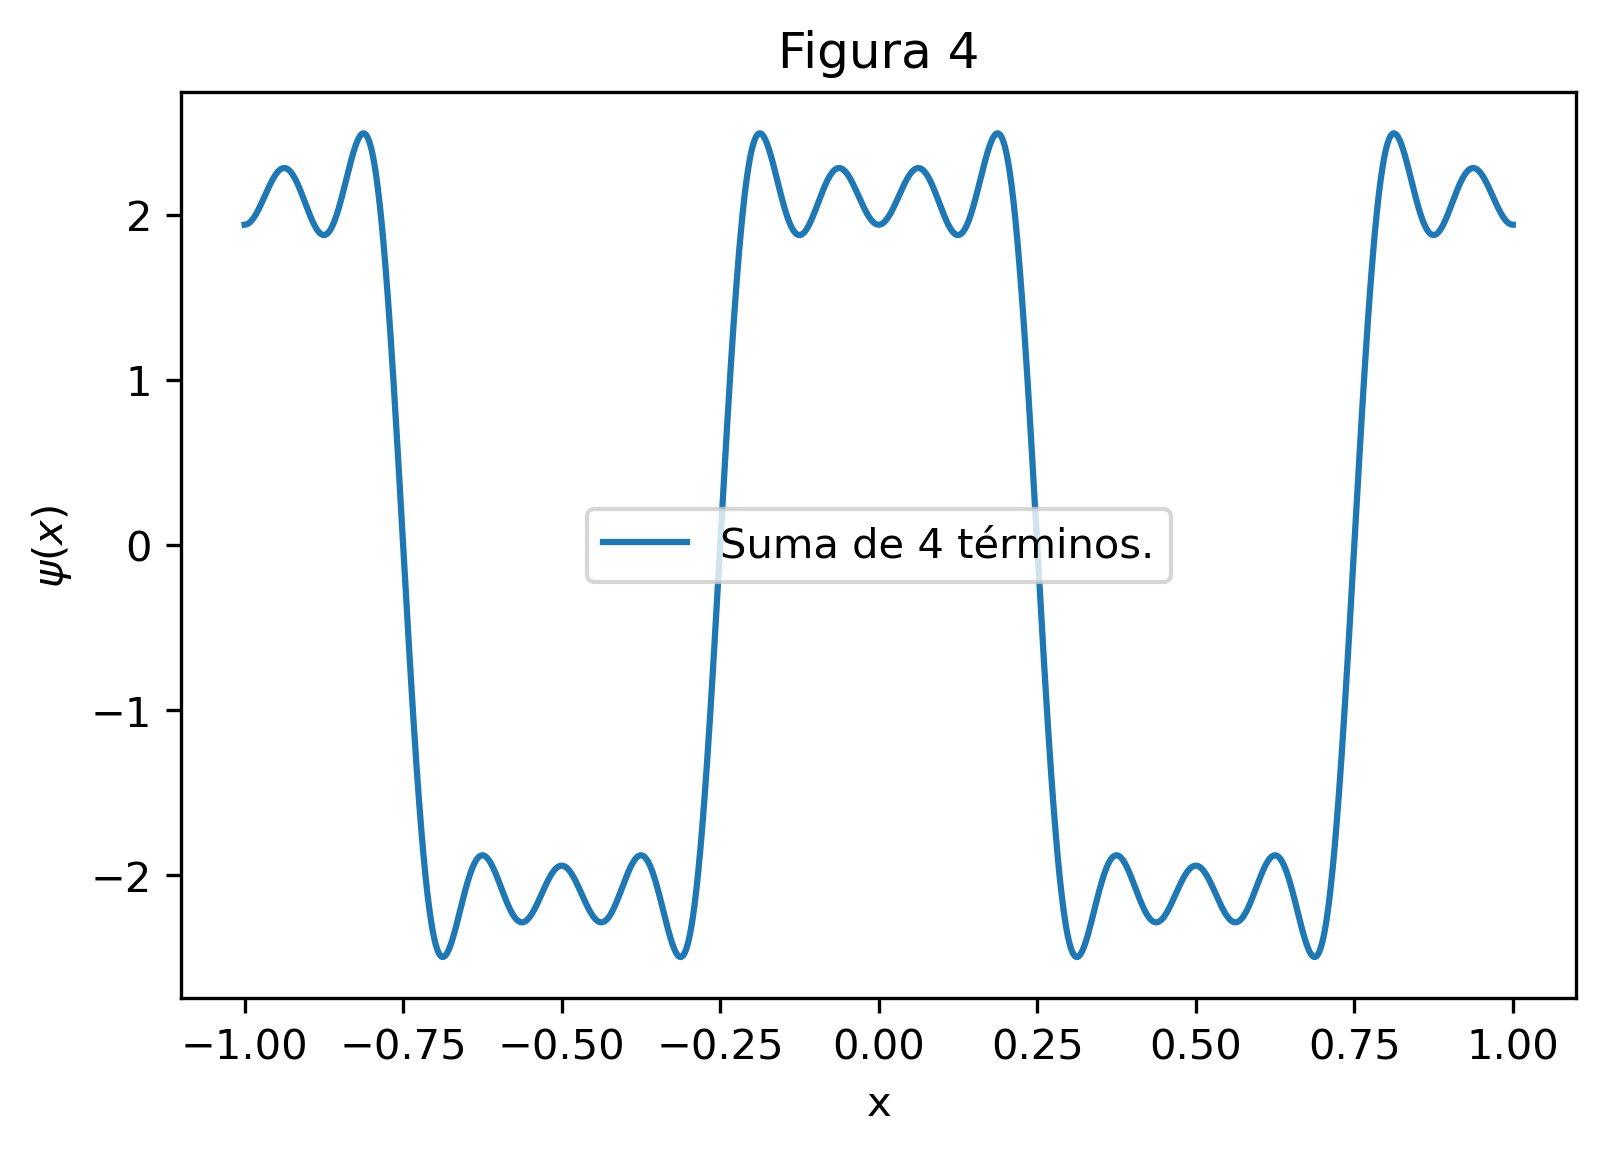

In [4]:
a_n = [2/np.pi, 0, -2/(3*np.pi), 0 , 2/(5*np.pi), 0, -2/(7*np.pi)]
λ = 1
x = np.linspace(-λ, λ, 2000)
ψ = 0
zero_an = 0
for n, a in enumerate(a_n):
    if a == 0:
        zero_an += 1
        continue
    ψ += a * np.cos(2 * np.pi * (n+1) * x / λ)
    ψo = np.trapz(np.abs(ψ[np.abs(x)<λ/2])**2, x=x[np.abs(x)<λ/2])
    ψ_normalized = ψ / ψo
    fig_num += 1
    plt.figure(dpi=dpi)
    plt.plot(x, ψ_normalized, label='Suma de %d términos.' % (n-zero_an+1))
    plt.xlabel('x')
    plt.ylabel(r'$\psi(x)$')
    plt.legend()
    plt.title('Figura %d' % fig_num)

### 4.2. Ventana: $g(k) = 1$ para $|k| \leq k_0$ y $g(k)=0$ para otro k.

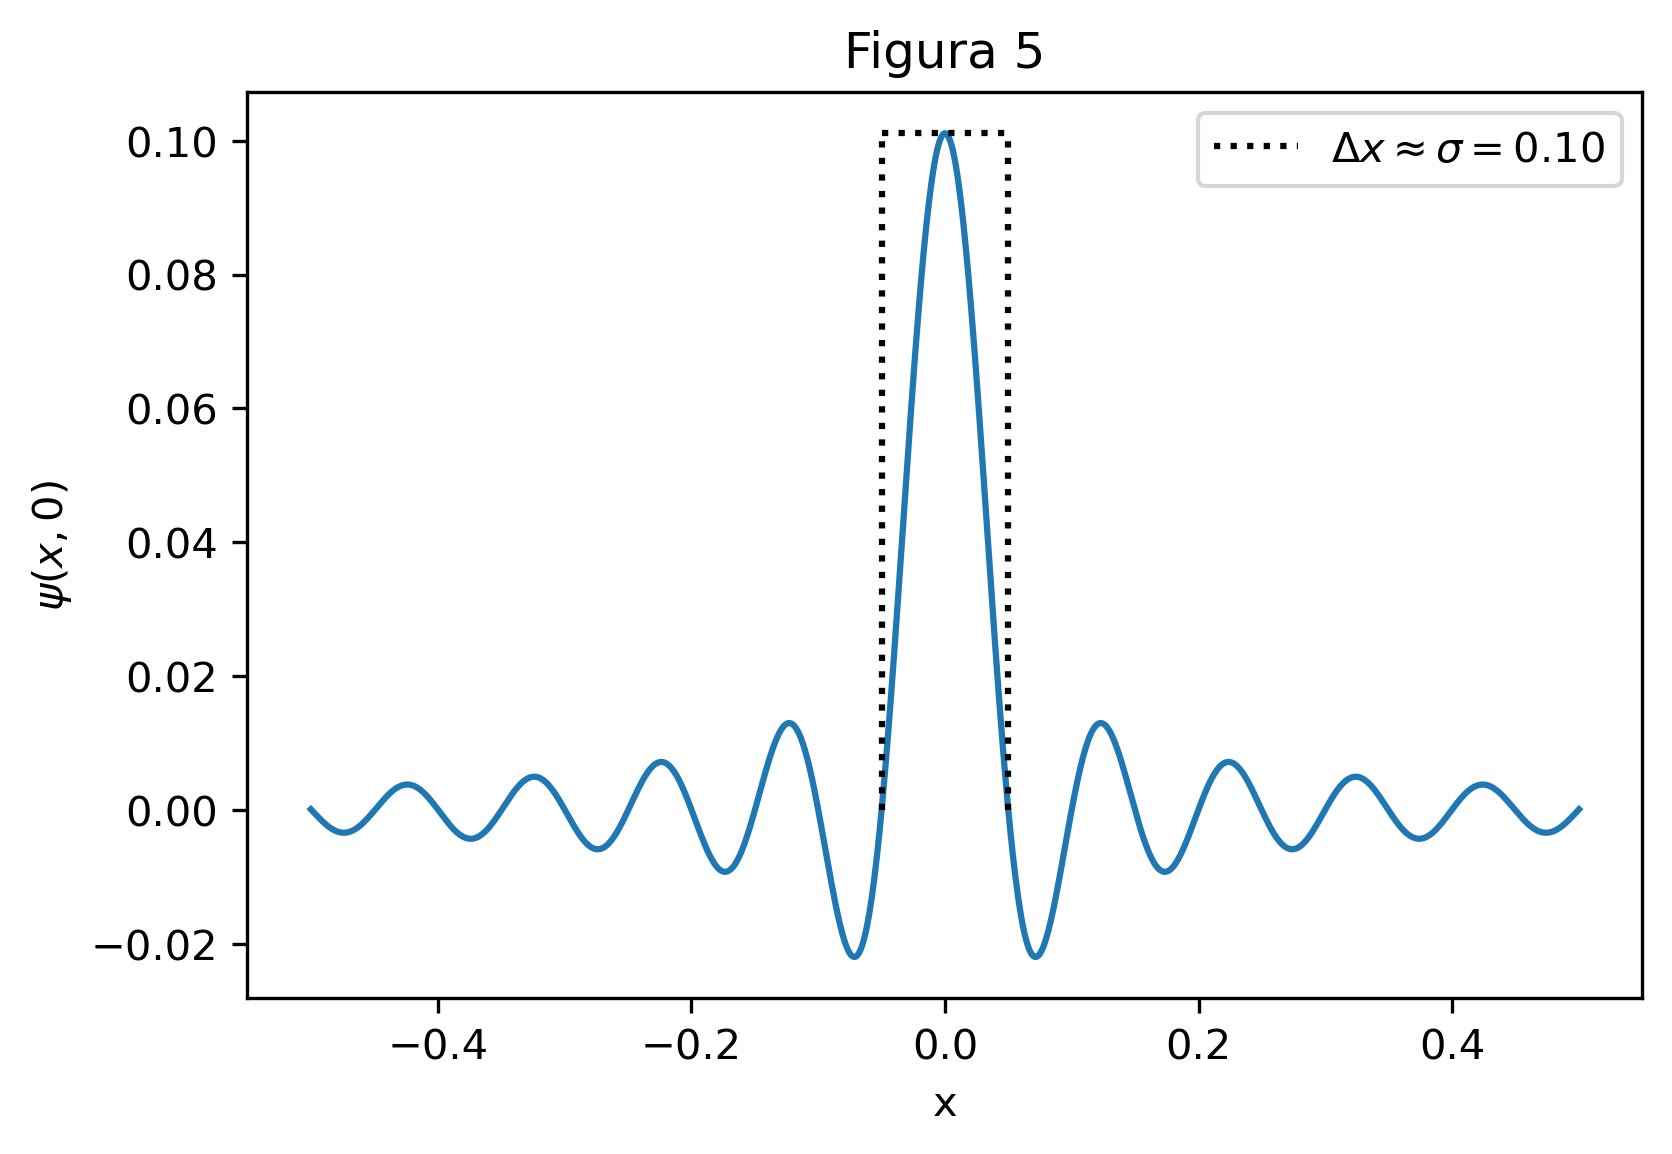

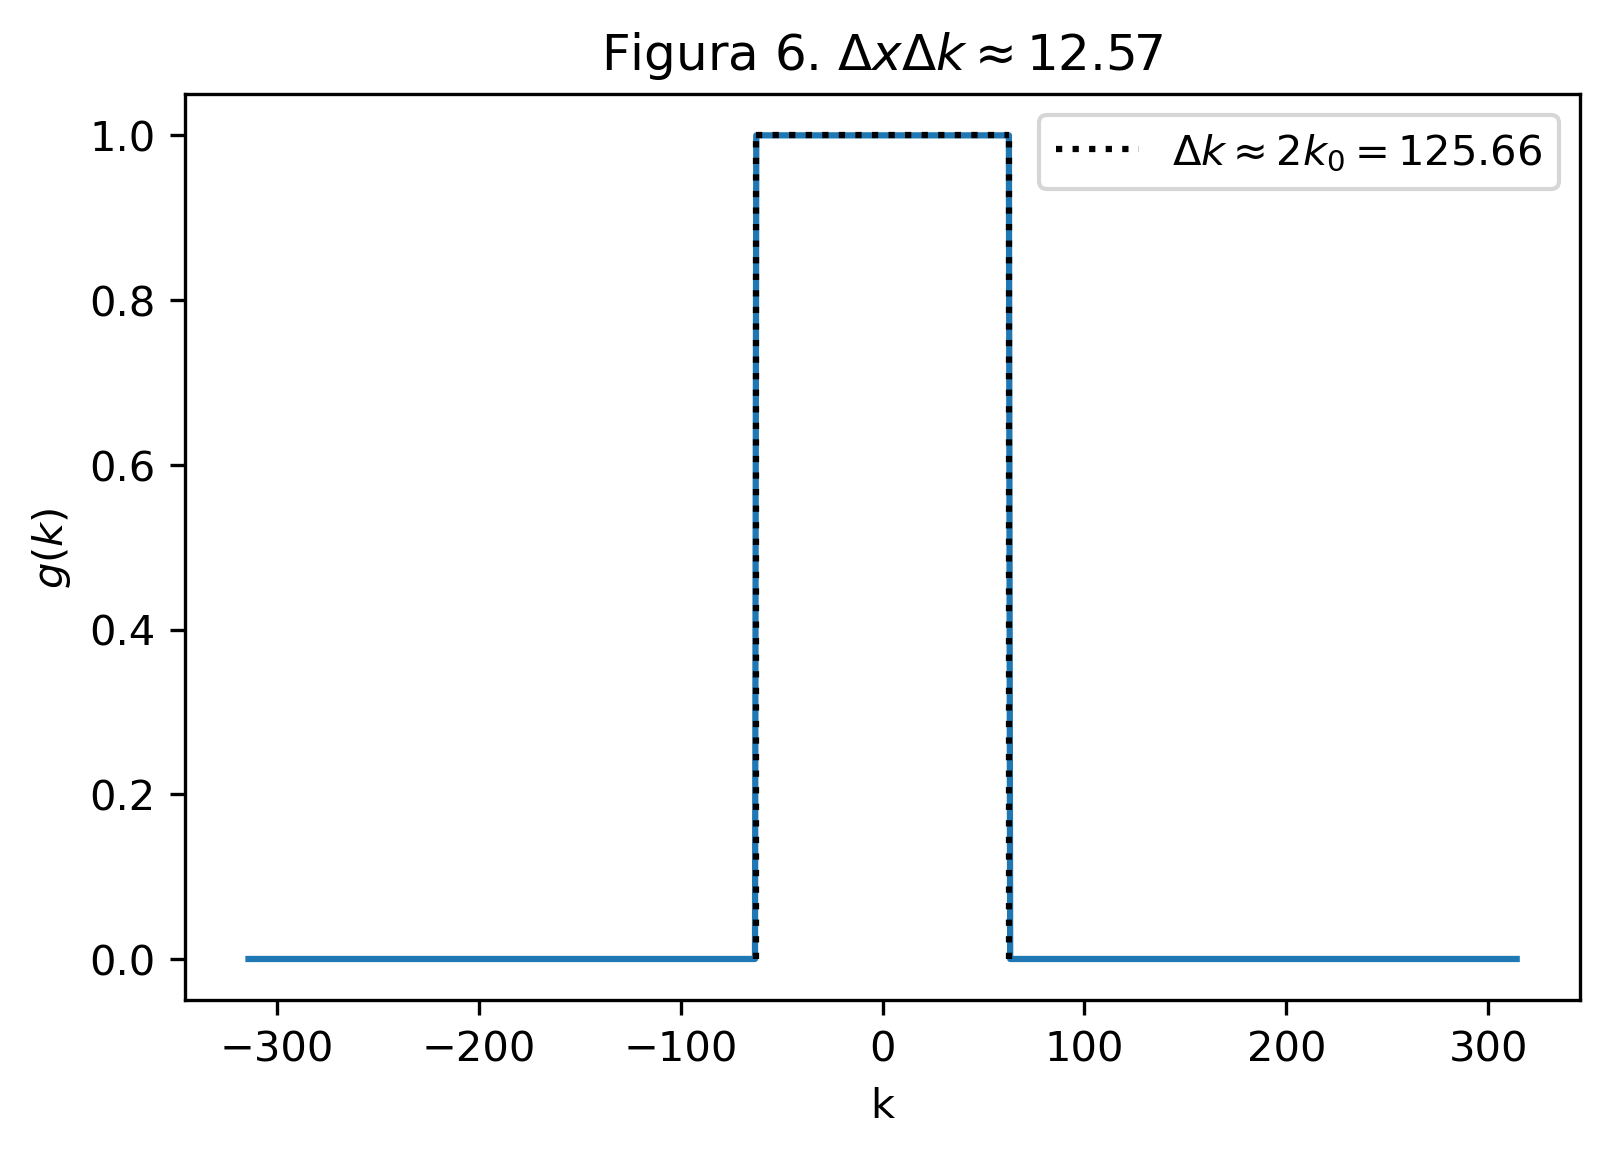

In [5]:
def g_func(σ, k_o, x, k):
    g = np.ones(len(k))
    g[np.abs(k) > k_o] = 0
    return g

fig_num = plot_wave_packet(
    0.1, 
    2*np.pi / 0.1, 
    g_func,
    fig_num=fig_num)

### 4.3. Seno cardinal: $g(k) = \frac{sen(kD)}{kD}$, donde $2D$ es el ancho del paquete de onda.

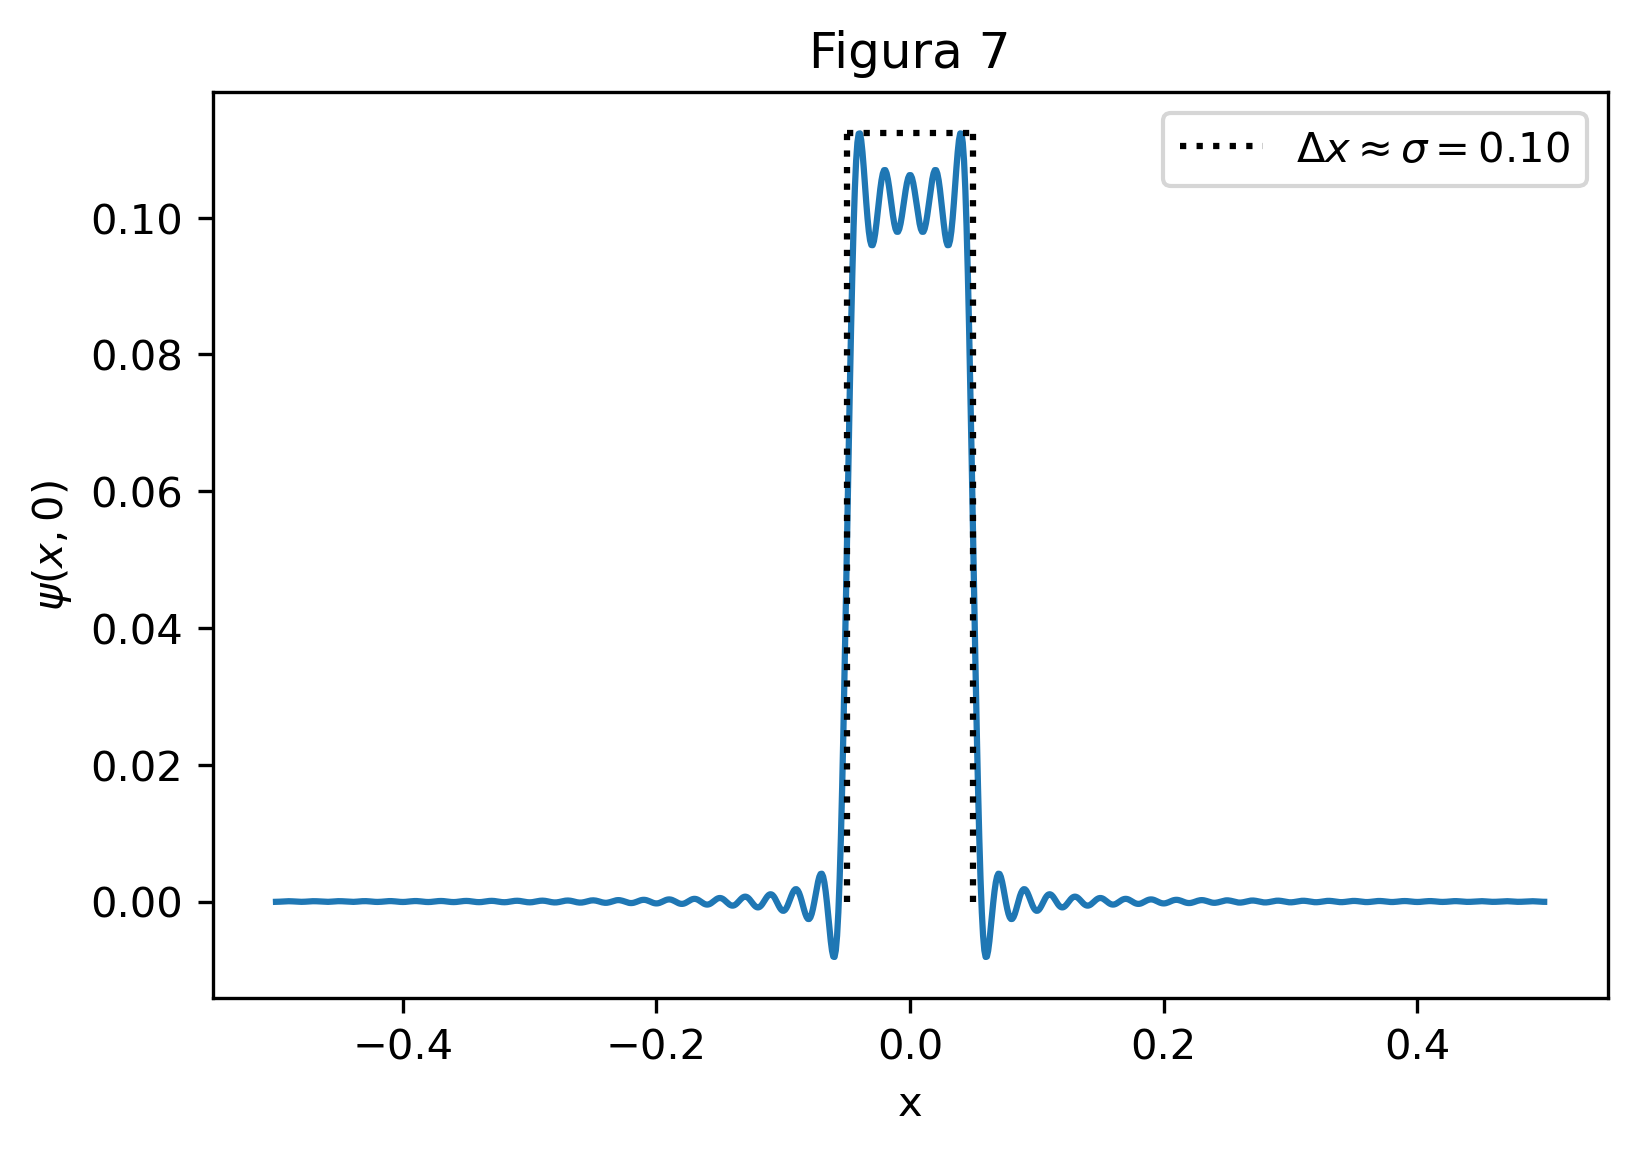

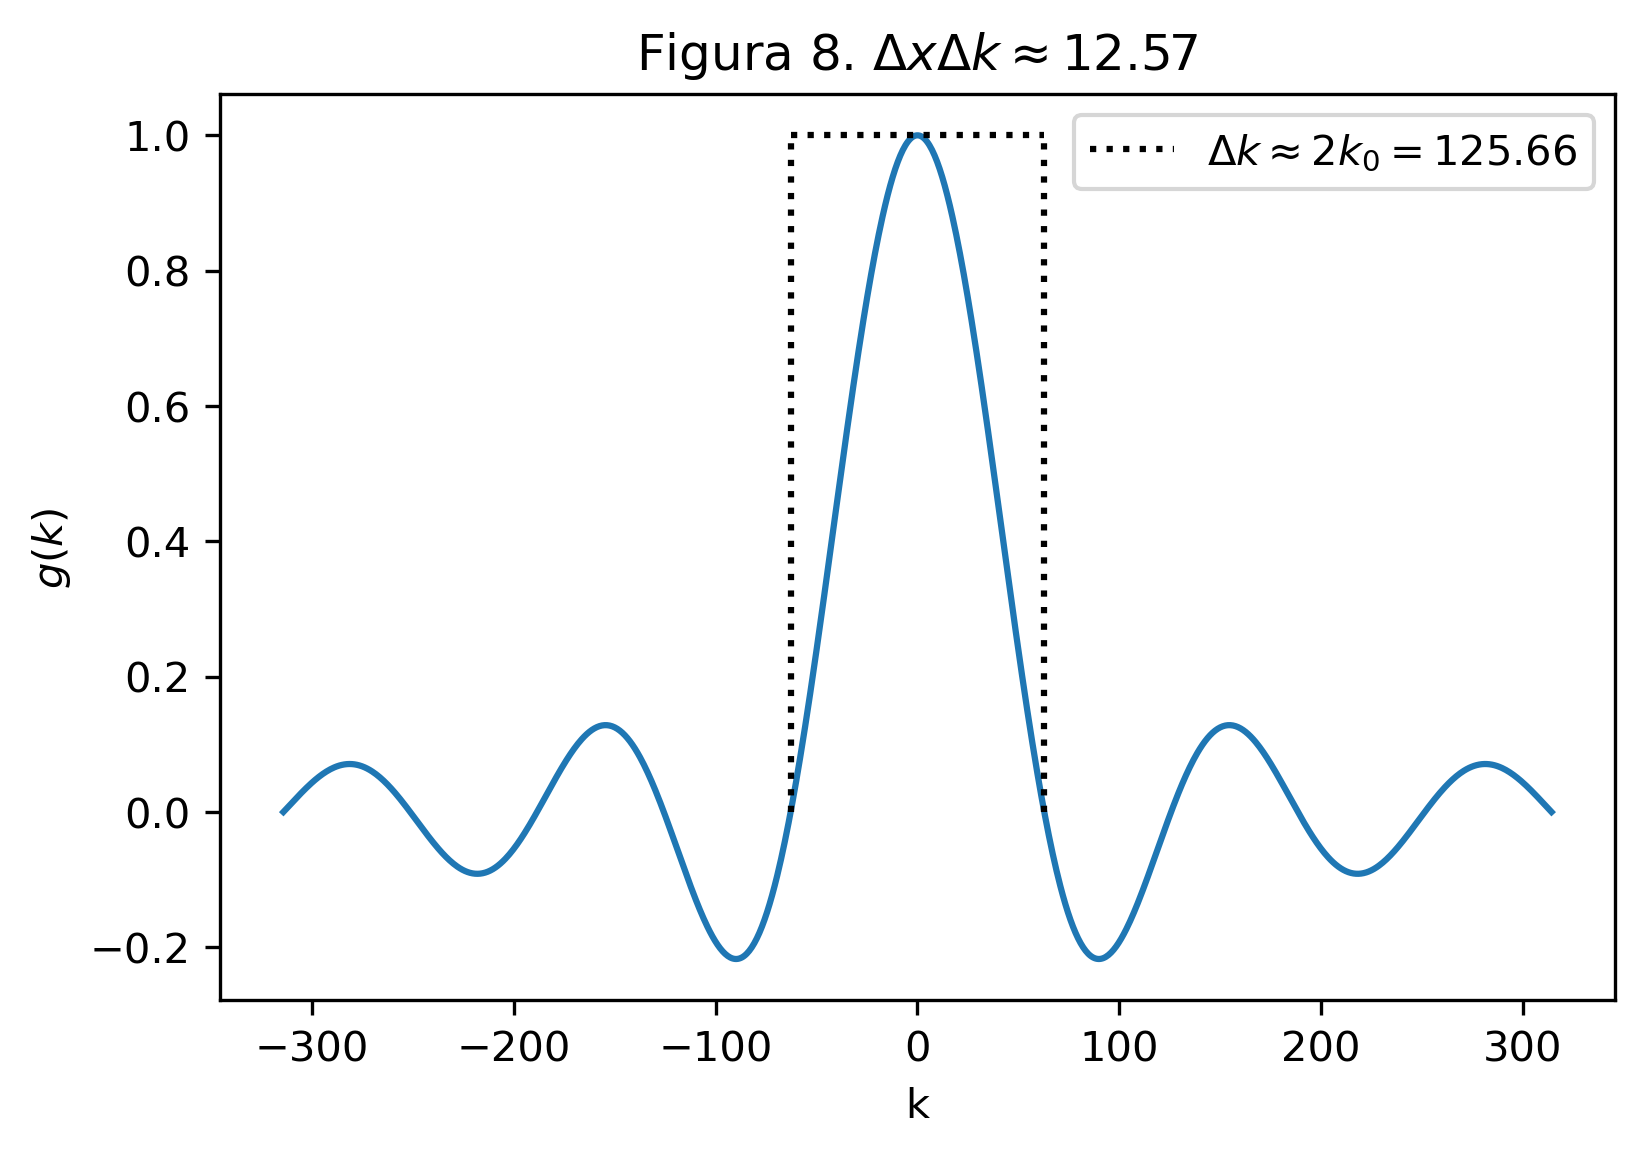

In [6]:
fig_num = plot_wave_packet(
    0.1, 
    2*np.pi / 0.1, 
    lambda σ, k_o, x, k : np.sin(k*σ/2) / (k*σ/2),
    fig_num=fig_num)

### 4.4. Gauciana: $g(k) = \frac{1}{\sqrt{\pi}} e^{-k^2/k_o^2}$

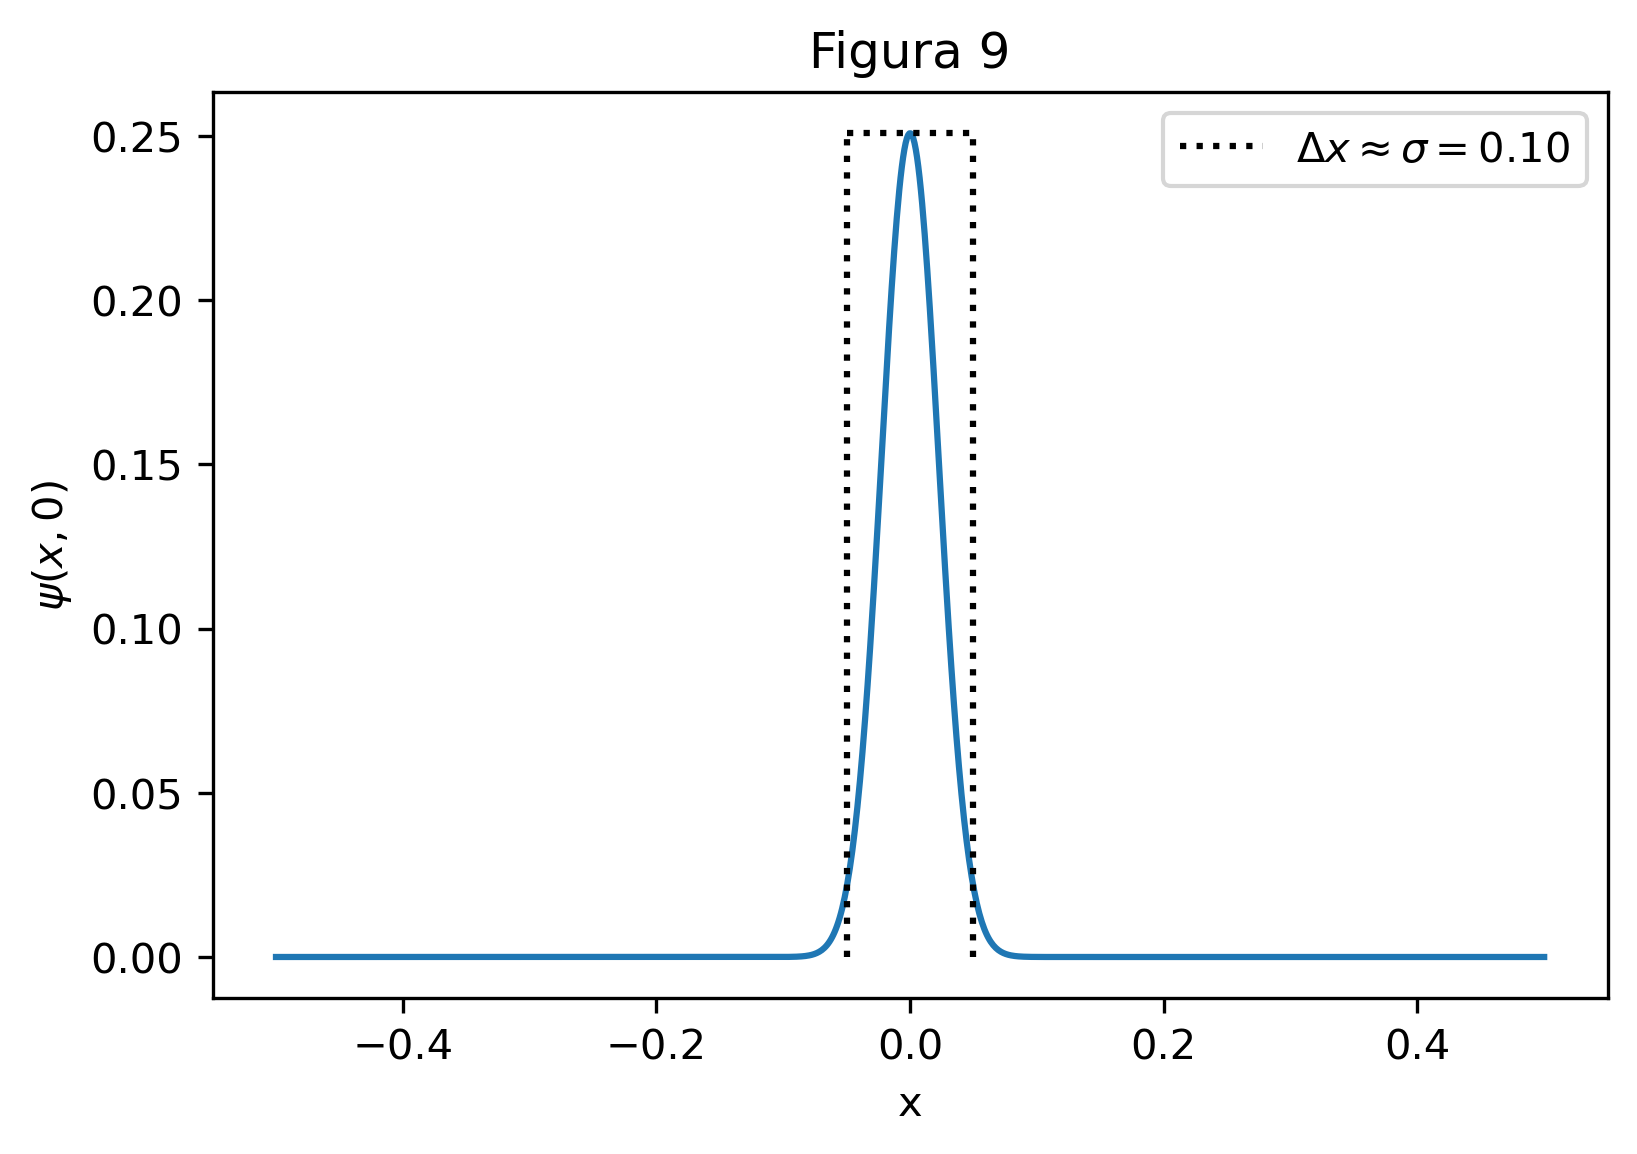

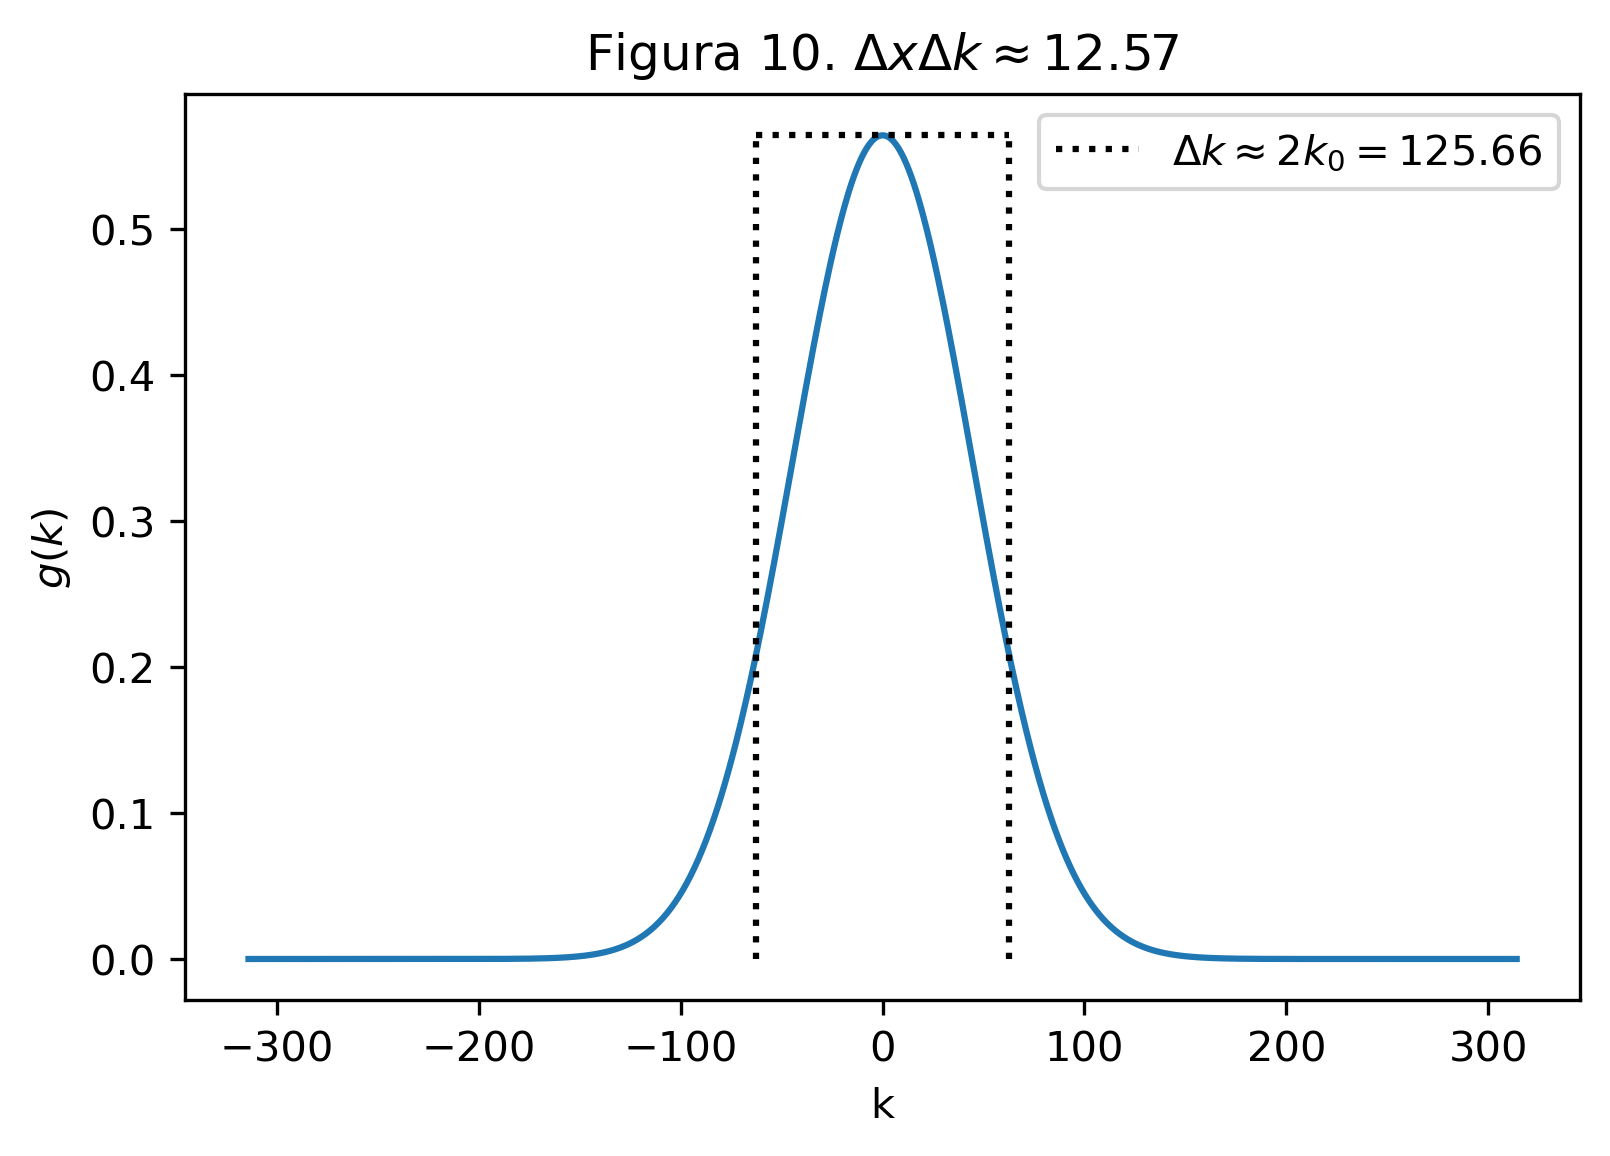

In [7]:
fig_num = plot_wave_packet(
    0.1, 
    2*np.pi / 0.1, 
    lambda σ, k_o, x, k : np.exp(-(k/k_o)**2) / np.sqrt(np.pi),
    fig_num=fig_num)

## 5. Preguntas de autoexplicación

### 5.1. Primer bloque de preguntas

End!